In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.append('../code/process/')
import cleaning
from omegaconf import OmegaConf

In [2]:
# NAS: /AIC-shared1/BP-paper-data/segmented/uci_data_5s.pkl
df = pd.read_pickle('../datasets/segmented/UCI.pkl')
args = OmegaConf.load('../code/process/core/config/preprocessing/uci_clean.yaml')
os.makedirs(os.path.dirname(args.path.log), exist_ok=True)
cl_log = open(args.path.log, "w") ## Read logging file

In [3]:
   #---------- ABP ----------#
#---------- Filter bad ABP ----------#
cleaning._print_step("Abnormal ABP values",cl_log)
df = cleaning._compute_naive_BP(df)
df = cleaning._abnormal_BP(df, args, cl_log, isABP=True)
cleaning._print_n_samples(df, cl_log)

#---------- ABP Peaks and valleys computation ----------#
cleaning._print_step("ABP Peaks and valleys computation",cl_log)
df = cleaning._compute_corrected_pks_vlys(df, args, isABP=True)

cleaning._print_step("Number of heart cycles (ABP)",cl_log)
df = cleaning._remove_amount_peaks_valleys(df, args, cl_log)
cleaning._print_n_samples(df, cl_log)

#---------- BPM limitation ----------#
cleaning._print_step("BPM limitation (ABP)",cl_log)
df = cleaning._compute_quality_idx(df, args, isABP=True)
df = cleaning._limitation_bpm(df, args, cl_log, isABP=True)
cleaning._print_n_samples(df, cl_log)

#---------- Pulse pressure ----------#
cleaning._print_step("Pulse pressure limitation (ABP)",cl_log)
df = cleaning._compute_BP_labels(df) #Compute BP labels
df = cleaning._remove_pulse_pressure(df, args, cl_log)
cleaning._print_n_samples(df, cl_log)

#---------- PPG ----------#

#---------- PPG Peaks and valleys computation ----------#
cleaning._print_step("PPG Peaks and valleys computation",cl_log)
df = cleaning._all_peaks_valleys(df, args, cl_log)
cleaning._print_n_samples(df, cl_log)

#---------- BPM limitation (PPG) ----------#
cleaning._print_step("BPM limitation (PPG)",cl_log)
df = cleaning._compute_quality_idx(df, args, isABP=False)
df = cleaning._limitation_bpm(df, args, cl_log, isABP=False)
cleaning._print_n_samples(df, cl_log)

--- Abnormal ABP values ---
data size:  11841, 11841, 518020
--- ABP Peaks and valleys computation ---
--- Number of heart cycles (ABP) ---
data size:  11823, 11823, 516770
--- BPM limitation (ABP) ---
data size:  11803, 11803, 515815
--- Pulse pressure limitation (ABP) ---
data size:  11788, 11788, 515359
--- PPG Peaks and valleys computation ---
data size:  11785, 11785, 515324
--- BPM limitation (PPG) ---
data size:  11710, 11710, 509453


In [4]:
df.head()

,patient,trial,signal,abp_signal,SP,DP,bp_dif,abp_flag1,abp_flag2,abp_pks,...,ppg_pks_amp,ppg_pks_amp_std,ppg_pks_amp_dif_std,ppg_v2v_dif,ppg_v2v,ppg_vlys_bpm,ppg_v2v_std,ppg_vlys_amp,ppg_vlys_amp_std,ppg_vlys_amp_dif_std
0,Part_1_0,Part_1_0_0,"[1.7380254154447703, 1.95405669599218, 2.17106...","[67.0629551659967, 69.3586280667992, 75.366452...",121.621820,67.185065,54.436754,False,False,"[73, 136, 197, 258, 321, 382, 443, 503, 563]",...,"[2.9178885630498534, 2.8905180840664713, 2.808...",0.087312,0.106593,"[62, 62, 61, 62, 61, 62, 60, 60, 61]",61.0,122.95082,0.785674,"[1.1358748778103618, 1.121212121212121, 1.0664...",0.040183,0.062152
1,Part_1_0,Part_1_0_1,"[2.9853372434017595, 2.9667644183773216, 2.936...","[124.99206283305574, 124.40593358178702, 123.5...",124.357089,68.967875,55.389214,False,False,"[60, 120, 179, 240, 300, 361, 421, 481, 541]",...,"[2.8944281524926687, 2.7722385141739982, 2.722...",0.084831,0.100652,"[60, 60, 60, 60, 61, 60, 60, 60, 61]",60.0,125.00000,0.415740,"[1.115347018572825, 1.0312805474095796, 1.0029...",0.061145,0.083547
2,Part_1_0,Part_1_0_2,"[1.5757575757575757, 1.5513196480938416, 1.526...","[81.86271876053202, 81.56965413489766, 81.1789...",125.871257,69.773803,56.097454,False,False,"[38, 98, 158, 219, 280, 341, 402, 462, 523]",...,"[2.9120234604105573, 2.7976539589442817, 2.888...",0.064865,0.088126,"[61, 60, 61, 61, 61, 60, 61, 61, 60]",61.0,122.95082,0.471405,"[1.1241446725317692, 0.9853372434017595, 1.111...",0.044948,0.077278
3,Part_1_0,Part_1_0_3,"[1.0009775171065494, 0.9804496578690127, 0.961...","[70.9216394035158, 70.53088656933666, 70.09128...",122.671968,67.111799,55.560169,False,False,"[20, 81, 143, 204, 265, 325, 386, 447, 508, 569]",...,"[2.811339198435973, 2.9042033235581624, 2.9824...",0.074758,0.090738,"[60, 61, 61, 62, 60, 61, 61, 61, 61, 60]",61.0,122.95082,0.600000,"[0.9208211143695014, 1.0654936461388074, 1.064...",0.081663,0.076435
4,Part_1_0,Part_1_0_4,"[2.7370478983382207, 2.7810361681329425, 2.803...","[115.66283891702852, 118.98423800755131, 121.1...",125.578192,69.212096,56.366096,False,False,"[64, 124, 185, 245, 305, 365, 425, 485, 546]",...,"[2.809384164222874, 2.986314760508309, 2.97262...",0.082992,0.098903,"[60, 61, 61, 59, 60, 60, 60, 61, 60]",60.0,125.00000,0.628539,"[1.1730205278592376, 1.0977517106549364, 1.088...",0.070587,0.072146


In [5]:
df.columns

Index(['patient', 'trial', 'signal', 'abp_signal', 'SP', 'DP', 'bp_dif',
       'abp_flag1', 'abp_flag2', 'abp_pks', 'abp_vlys', 'abp_p2p_dif',
       'abp_p2p', 'abp_pks_bpm', 'abp_p2p_std', 'abp_pks_amp',
       'abp_pks_amp_std', 'abp_pks_amp_dif_std', 'abp_v2v_dif', 'abp_v2v',
       'abp_vlys_bpm', 'abp_v2v_std', 'abp_vlys_amp', 'abp_vlys_amp_std',
       'abp_vlys_amp_dif_std', 'abp_p2v_amp', 'ppg_pks', 'ppg_vlys',
       'ppg_p2p_dif', 'ppg_p2p', 'ppg_pks_bpm', 'ppg_p2p_std', 'ppg_pks_amp',
       'ppg_pks_amp_std', 'ppg_pks_amp_dif_std', 'ppg_v2v_dif', 'ppg_v2v',
       'ppg_vlys_bpm', 'ppg_v2v_std', 'ppg_vlys_amp', 'ppg_vlys_amp_std',
       'ppg_vlys_amp_dif_std'],
      dtype='object')

In [6]:
th_p2p_std = args.distorted_th.th_p2p_std
th_amp_ppg_std = args.distorted_th.th_amp_ppg_std

In [37]:
th_p2p_std,th_amp_ppg_std

(30, 0.5)

In [7]:
fsize=14

In [8]:
plt.rcParams.update({'figure.autolayout': True})

In [9]:
plt.figure(figsize=(7,5))

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

99.60585176650251
97.26726508627881


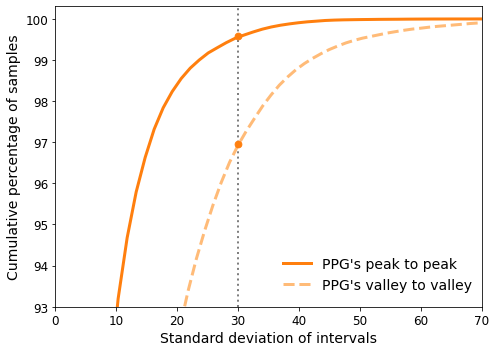

In [26]:
bins = 100
th = th_p2p_std
fig = plt.figure(figsize=(7,5))

dic_names={
    'abp_p2p_std':"ABP's peak to peak",
    'ppg_p2p_std':"PPG's peak to peak",
    'abp_v2v_std':"ABP's valley to valley",
    'ppg_v2v_std':"PPG's valley to valley",
    'abp_pks_amp_std':"ABP's peaks",
    'ppg_pks_amp_std':"PPG's peaks",
    'abp_vlys_amp_std':"ABP's valleys",
    'ppg_vlys_amp_std':"PPG's valleys",
    
}
for var,c in zip(['ppg_p2p_std' ,'ppg_v2v_std'],
              [plt.cm.tab20(2),plt.cm.tab20(3)]):
    if 'v2v' in var:
        ls='--'
    else:
        ls='-'
        
    data = df[var].values
    values, base = np.histogram(data, bins=bins)
    cumulative = np.cumsum(values)/len(data)*100
    #per = sum(data <= th)/len(data) * 100
    plt.plot(base[:-1], cumulative, linewidth=3, label=dic_names[var], color=c, ls=ls)
    c_alt = plt.cm.tab20(0) if 'abp' in var else plt.cm.tab20(2)
    #plt.scatter(th,cumulative[(base<th).sum()], s=45, color=c_alt, zorder=3)
    print(cumulative[(base<th).sum()])
 
'''
#98.72605446267502
plt.scatter(th,98.67, s=45, color=plt.cm.tab20(0), zorder=3)
#97.56056180740487
plt.scatter(th,97.5, s=45, color=plt.cm.tab20(0), zorder=3)
'''
#99.60585176650251
plt.scatter(th,99.585, s=45, color=plt.cm.tab20(2), zorder=3)
#97.26726508627881
plt.scatter(th,96.95, s=45, color=plt.cm.tab20(2), zorder=3)


plt.axvline(th, 0, 1, ls=':', color='tab:grey', linewidth=2)
plt.ylim(93,100.3)
plt.xlim(0,70)
plt.legend(loc=(0.52, 0.03),fontsize=fsize,frameon=False)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Standard deviation of intervals',size=fsize)
plt.ylabel('Cumulative percentage of samples',size=fsize)

'''
ax2=plt.twiny()
plt.xticks(weight = 'bold')
ax2.tick_params(axis='both', which='both', labelsize=12)
ax2.tick_params(axis='x', colors='w')
'''


fig.tight_layout()
plt.savefig('./fig-BP/th_plot_dis.pdf',format='pdf', dpi=300)
plt.show()

98.55629469254279
99.02974366624595


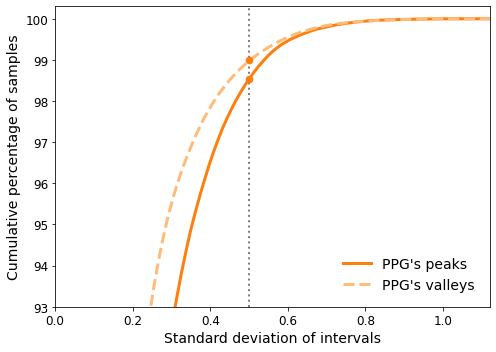

In [36]:
plt.figure(figsize=(7,5))
bins = 100
th = th_amp_ppg_std

for var,c in zip(['ppg_pks_amp_std' ,'ppg_vlys_amp_std'],
              [plt.cm.tab20(2),plt.cm.tab20(3)]):
    if 'vlys' in var:
        ls='--'
    else:
        ls='-'
        
    data = df[var].values
    values, base = np.histogram(data, bins=bins)
    cumulative = np.cumsum(values)/len(data)*100
    #per = sum(data <= th)/len(data) * 100
    plt.plot(base[:-1], cumulative, linewidth=3, label=dic_names[var], color=c, ls=ls)
    c_alt = plt.cm.tab20(0) if 'abp' in var else plt.cm.tab20(2)
    #plt.scatter(th,cumulative[(base<th).sum()], s=45, color=c_alt, zorder=3)
    print(cumulative[(base<th).sum()])
    
#98.55629469254279
plt.scatter(th,98.54, s=45, color=plt.cm.tab20(2), zorder=3)
#99.02974366624595
plt.scatter(th,99.005, s=45, color=plt.cm.tab20(2), zorder=3)


plt.axvline(th, 0, 1, ls=':', color='tab:grey', linewidth=2)
plt.ylim(93,100.3)
plt.xlim(0,1.12)
plt.legend(loc=(0.65, 0.03),fontsize=fsize,frameon=False)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Standard deviation of intervals',size=fsize)
plt.ylabel('Cumulative percentage of samples',size=fsize)

'''
ax2=plt.twiny()
plt.xticks(weight = 'bold')
ax2.tick_params(axis='both', which='both', labelsize=12)
ax2.tick_params(axis='x', colors='w')
'''


fig.tight_layout()
plt.savefig('./fig-BP/th_plot_amp.pdf',format='pdf', dpi=300)
plt.show()



98.34163731638176
99.74637058671935
95.60368525040805
96.43995361223261


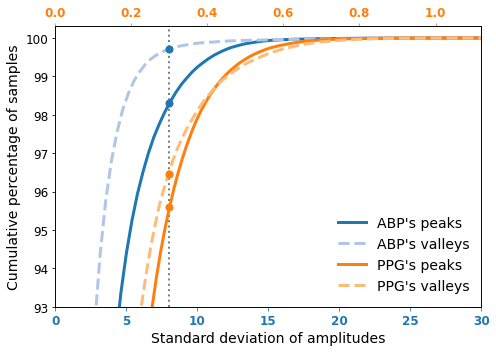

In [73]:
bins = 100
fig, ax = plt.subplots(1,1,figsize=(7,5))

var='abp_pks_amp_std'
values, base = np.histogram(df[var].values, bins=bins)
cumulative = np.cumsum(values)/df.shape[0]*100
ax.plot(base[:-1], cumulative, linewidth=3, label=dic_names[var], color=plt.cm.tab20(0), ls='-')
print(cumulative[(base<th_amp_abp_std).sum()])#98.34163731638176
ax.scatter(th_amp_abp_std,98.3, s=50, color=plt.cm.tab20(0), zorder=3)

var='abp_vlys_amp_std'
values, base = np.histogram(df[var].values, bins=bins)
cumulative = np.cumsum(values)/df.shape[0]*100
ax.plot(base[:-1], cumulative, linewidth=3, label=dic_names[var], color=plt.cm.tab20(1), ls='--')
print(cumulative[(base<th_amp_abp_std).sum()])#99.74637058671935
ax.scatter(th_amp_abp_std,99.7, s=50, color=plt.cm.tab20(0), zorder=3)

#ax.axvline(th_amp_abp_std, 0, 1, label='Threshold', ls=':', color=plt.cm.tab20(0), linewidth=2, zorder=2)
plt.xticks(weight = 'bold')

ax2=ax.twiny()

var='ppg_pks_amp_std'
values, base = np.histogram(df[var].values, bins=bins)
cumulative = np.cumsum(values)/df.shape[0]*100
ax2.plot(base[:-1], cumulative, linewidth=3, label=dic_names[var], color=plt.cm.tab20(2), ls='-', zorder=1)
print(cumulative[(base<th_amp_ppg_std).sum()])#95.60368525040805
ax2.scatter(th_amp_ppg_std,95.6, s=50, color=plt.cm.tab20(2), zorder=3)

var='ppg_vlys_amp_std'
values, base = np.histogram(df[var].values, bins=bins)
cumulative = np.cumsum(values)/df.shape[0]*100
ax2.plot(base[:-1], cumulative, linewidth=3, label=dic_names[var], color=plt.cm.tab20(3), ls='--', zorder=1)
print(cumulative[(base<th_amp_ppg_std).sum()-1])#96.43995361223261
ax2.scatter(th_amp_ppg_std,96.45, s=50, color=plt.cm.tab20(2), zorder=3)

ax.axvline(th_amp_abp_std, 0, 1, ls=':', color='tab:grey', linewidth=2, zorder=0)
#ax2.axvline(th_amp_ppg_std, 0, 1, ls=':', color='tab:grey', linewidth=2, zorder=2)

ax.tick_params(axis='both', which='both', labelsize=12)
ax2.tick_params(axis='both', which='both', labelsize=12)
#ax.tick_params(axis='both', which='minor', labelsize=8)
ax.tick_params(axis='x', colors=plt.cm.tab20(0))
ax2.tick_params(axis='x', colors=plt.cm.tab20(2))
#ax.yaxis.label.set_color(plt.cm.tab20(0))
#ax2.xaxis.label.set_color(plt.cm.tab20(2))

plt.ylim(93,100.3)
ax.set_xlim(0,30)
ax2.set_xlim(0,1.12)
plt.xticks(weight = 'bold')
ax.set_ylabel('Cumulative percentage of samples',size=fsize)
ax.set_xlabel("Standard deviation of amplitudes",size=fsize)#, color=plt.cm.tab20(0))
#ax2.set_xlabel("Standard deviation of PPG's amplitudes",size=fsize)#, color=plt.cm.tab20(2))
ax.legend(loc=(0.65, 0.18),fontsize=fsize, frameon=False)
ax2.legend(loc=(0.65, 0.03),fontsize=fsize, frameon=False)
fig.tight_layout()
plt.savefig('./fig-BP/th_plot_amp.pdf',format='pdf', dpi=300)
plt.show()